<a href="https://colab.research.google.com/github/jro17002/ChEMBL-Feature-Selection/blob/main/ChEMBL_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Possible Features

This section will go over understanding the possible features we can use. To be continued. 

In [ ]:
#Setup
import pprint
from IPython.display import display, SVG, HTML
#official Python client library developed and supported by ChEMBL group
!pip install chembl_webresource_client

In [ ]:
# Python modules used for API access
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule

In [ ]:
#available resources, possible features
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
pprint.pprint(available_resources)

#Understanding ChEMBL API

This section used to understand & work w/ ChEMBL API

In [ ]:
#Setup
import pprint
#official Python client library developed and supported by ChEMBL group
!pip install chembl_webresource_client

In [ ]:
# Python modules used for API access
from chembl_webresource_client.new_client import new_client
activity = new_client.activity
activity_supplementary_data_by_activity = new_client.activity_supplementary_data_by_activity
assay = new_client.assay
drug = new_client.drug
molecule = new_client.molecule
molecule_form = new_client.molecule_form
image = new_client.image
image.set_format('svg')

In [ ]:
#print molecule by chemblID, additonal possible features
m1 = molecule.get('CHEMBL25')
pprint.pprint(m1)

In [ ]:
#print canonical SMILES from ChemblID
m1 = molecule.get('CHEMBL25')
pprint.pprint(m1['molecule_structures']['canonical_smiles'])

#print ChemblID from canonical SMILES
m1 = molecule.get('CC(=O)Oc1ccccc1C(=O)O')
pprint.pprint(m1['molecule_chembl_id'])

#flex match will attempt to match regardless of format, will possibly return multiple 
m1 = molecule.filter(molecule_structures__canonical_smiles__flexmatch = 'CC(=O)Oc1ccccc1C(=O)O')
pprint.pprint(m1)

In [ ]:
#filter, return chemblIDs w/ pref_name aspirin
#note to self look into chembl_webresource_client/scripts/chembl_ids.py, might be useful to do in bulk idk
#seems pref_name must be capitalized
m1 = molecule.filter(pref_name='ASPIRIN')
pprint.pprint(m1[0]['molecule_chembl_id'])

#filter, return chemblIDs w/ pref_name from list 
mn = ['aspirin', 'ibuprofen', 'acetaminophen', 'hydroxychloroquine', 'mtndew']
for i in mn:
  m1 = molecule.filter(pref_name = i.upper()).only(['molecule_chembl_id'])
  try:
    pprint.pprint(m1[0]['molecule_chembl_id'])
  except:
    print("Pref_name", i , "not found")
    pass

In [ ]:
#get drug information of ChEMBL25, aspirin
m1 = drug.get('CHEMBL25')
pprint.pprint(m1)

In [ ]:
#get molecule strutures of aspirin
m1 = molecule.get('CHEMBL25')
pprint.pprint(m1['molecule_structures'])

In [ ]:
#print molecule molfile of aspirin
m1 = molecule.get('CHEMBL25')
pprint.pprint(m1['molecule_structures']['molfile'])

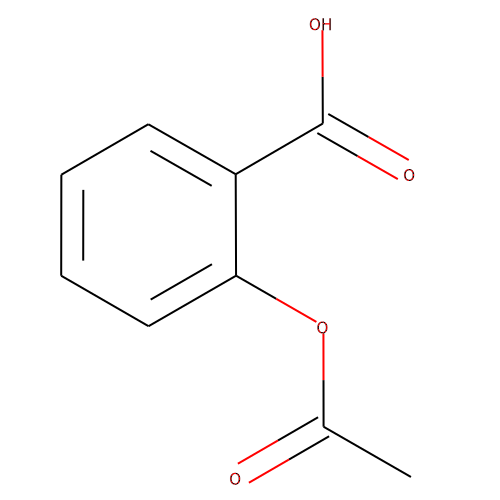

In [ ]:
#return image from ChEMBL ID
m1 = image.get('CHEMBL25')
SVG(m1)

# Extracting Features

In [ ]:
#Setup
import pprint
from IPython.display import display, SVG
import pandas as pd
#official Python client library developed and supported by ChEMBL group
!pip install chembl_webresource_client

In [ ]:
# Python modules used for API access
from chembl_webresource_client.new_client import new_client
activity = new_client.activity
activity_supplementary_data_by_activity = new_client.activity_supplementary_data_by_activity
assay = new_client.assay
drug = new_client.drug
molecule = new_client.molecule
molecule_form = new_client.molecule_form
image = new_client.image
image.set_format('svg')

Lets try to use Smiles strings to return some information. First, we will start with the basic return ChEMBL ID.

In [ ]:
#from a generated csv file from chembl return ChEMBL IDs, 
dataSet = pd.read_csv('/content/drive/MyDrive/ChEMBL/DOWNLOAD-5k4GGzD9cVYXAlTnoj4F-G3sto_CHD3aZRE056naF_s=.csv', sep=';', error_bad_lines=False)
dataSet = dataSet[dataSet['Smiles'].notna()]

#list of smiles strings from a ChEMBL generated csv file
smiles_strings = dataSet.iloc[1:,30]

#print(smiles_strings.head)

#list of ChEMBL IDs
list_of_IDs = []

for i in range(0, len(smiles_strings)):
  try:
    m1 = molecule.get(smiles_strings[i])['molecule_chembl_id']
    list_of_IDs.append(m1)
  except:
    None

print(list_of_IDs)

Let's now look into returning some possible features, we will use smiles strings to get the molecule formula and molecular weight for example.

In [ ]:
#we will use the same smiles strings from above
list_of_molecule_formula = []
list_of_molecular_weights = []

for i in range(0, len(smiles_strings)):
  try:
    m1 = molecule.get(smiles_strings[i])['molecule_properties']
    list_of_molecule_formula.append(m1['full_molformula'])  #we can change this to any property in molecule_properties
    list_of_molecular_weights.append(m1['full_mwt'])
  except:
    None

print(list_of_molecule_formula)
print(list_of_molecular_weights)

['C56H87NO16', 'C14H22N2O', 'C25H38O3', 'C19H24N2O', 'C16H16ClNO2S', 'C12H21NO8S', 'C16H10N2O8S2', 'C2H3Cl3O2', 'C6H6N6O2', 'C27H32F2N8', 'C45H57NO14', 'C14H20N2O3', 'C8H9NO2', 'C5H9NO3', 'C62H111N11O12', 'C24H25ClFN5O2', 'C7H17Cl2N2O3P', 'C13H18O2', 'C9H9Cl2N3', 'C66H68CaF2N4O10', 'C22H29FO5', 'C17H11N5', 'C22H23N3O4', 'C5H10ClNO3', 'C26H29N3O6', 'ClK', 'C10H17N', 'C14H27N4O11P2+', 'C29H32O13', 'C9H8O4', 'H14MgO11S', 'C21H21F3IN3O2', 'C18H26ClN3', 'C18H28N2O', 'C22H26ClN7O2S', 'C5H9Cl2N3O2', 'H12Cl2MgO6', 'C24H31NO6', 'O2', 'C35H49N11O9S2', 'C6H12N3PS', 'C29H26ClFN4O4S', 'C6H14O6', 'C14H11NO5', 'C53H83NO14', 'C23H24ClN3O5', 'C23H20F3N5O2S2', 'C22H28FNa2O8P', 'C20H21N3', 'C15H15NO2S', 'C6H14O6S2', 'C20H27N5O2', 'CLi2O3', 'C16H25NO4', 'NO', 'C48H67N5O10', 'C4H11N5', 'C13H18N4O3', 'C31H34F2N6O2', 'C21H26N2O7', 'C9H12N5NaO4', 'C20H22N8O5', 'C22H24ClN3O4', 'C10H12O2', 'C10H13FN5O7P', 'C33H38N4O6', 'C46H83N13O11', 'C15H22FN3O6', 'CHNaO3', 'C20H28N2O5', 'C2H3NaO2']
['1030.30', '234.34', '386

Making dataframes of the possible features.

In [ ]:
df = []
for i in range(0, len(smiles_strings)):
  try:
    m1 = molecule.get(smiles_strings[i])['molecule_properties']
    #get the molform and molwt, additional features can be added
    molform = m1['full_molformula']
    molwt = m1['full_mwt']
    df.append([molform,molwt])
  except:
    None

df = pd.DataFrame(df, columns=['molform', 'molwt'])

df.head()

,molform,molwt
0,C56H87NO16,1030.30
1,C14H22N2O,234.34
2,C25H38O3,386.58
3,C19H24N2O,296.41
4,C16H16ClNO2S,321.83


Finally, a complete code with setup to produce a dataframe of some molecule properties from smiles

In [ ]:
#Setup
import pprint
from IPython.display import display, SVG
import pandas as pd
#official Python client library developed and supported by ChEMBL group
!pip install chembl_webresource_client

# Python modules used for API access, only molecule is used for this purpose
from chembl_webresource_client.new_client import new_client
drug = new_client.drug
molecule = new_client.molecule
molecule_form = new_client.molecule_form
image = new_client.image
image.set_format('svg')

#from a generated csv file from chembl return ChEMBL IDs, this will be adjusted based on format of csv file
dataSet = pd.read_csv('/content/drive/MyDrive/ChEMBL/DOWNLOAD-5k4GGzD9cVYXAlTnoj4F-G3sto_CHD3aZRE056naF_s=.csv', sep=';', error_bad_lines=False)
dataSet = dataSet[dataSet['Smiles'].notna()]

#list of smiles strings from a ChEMBL generated csv file, this will be adjusted based on format of csv file
smiles_strings = dataSet.iloc[1:,30]

df = []
for i in range(0, len(smiles_strings)):
  try:
    m1 = molecule.get(smiles_strings[i])['molecule_properties']
    #get the molform and molwt, additional features can be added
    molform = m1['full_molformula']
    molwt = m1['full_mwt']
    df.append([molform,molwt])
  except:
    None

df = pd.DataFrame(df, columns=['molform', 'molwt'])

df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# PubChem, from CID to Smiles

In [ ]:
!pip install pubchempy
import pubchempy as pcp
import pandas as pd
import time

In [ ]:
#load csv of CID and compund names into a dataframe

columns = ['CIDs', 'Name']
dataSet = pd.read_csv('/content/drive/MyDrive/ChEMBL/drug_names.csv',names = ['CIDs', 'names'], error_bad_lines=False)

CIDs_list = dataSet
CIDs_list['CIDs'] = dataSet['CIDs'].map(lambda x: x.lstrip('CID'))
CIDs_list = dataSet['CIDs'].tolist()

smiles_list = []

#for i in range(0, 357):
#  CID_compound = pcp.Compound.from_cid(CIDs_list[i])
#  smiles_list.append(CID_compound.canonical_smiles)
#  time.sleep(0.5)

#print("Success")


for i in range(357, 715):
  CID_compound = pcp.Compound.from_cid(CIDs_list[i])
  smiles_list.append(CID_compound.canonical_smiles)
  time.sleep(0.5)

print("Success")

#time.sleep(5)

#for i in range(715, 1072):
#  CID_compound = pcp.Compound.from_cid(CIDs_list[i])
#  smiles_list.append(CID_compound.canonical_smiles)
#  time.sleep(0.5)

#print("Success")

#time.sleep(5)

#for i in range(1072, 1430):
#  try:
#    CID_compound = pcp.Compound.from_cid(CIDs_list[i])
#    smiles_list.append(CID_compound.canonical_smiles)
#    time.sleep(0.5)
#  except:
#    smiles_list = 'NaN'
#    print("Error: ", i)

#print("Success")

#dataSet['Smiles'] = smiles_list



output = pd.DataFrame(smiles_list)
output1 = output.to_csv()

with open('/content/drive/MyDrive/ChEMBL/file2.csv', 'w') as f:
  f.write(output1)
